In [196]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

# Question 1

# a)

In [197]:
# define f(n)
def f(n):
    return (n*(((n+1)/n) - 1)) - 1

# define g(n)
def g(n):
    machine_epsilon = np.finfo(float).eps
    return f(n)/machine_epsilon

In [198]:
# n in [1, 1000]
n = np.linspace(1, 1000, 1000)

# g(n)
g_n = np.array([g(n_i) for n_i in n])

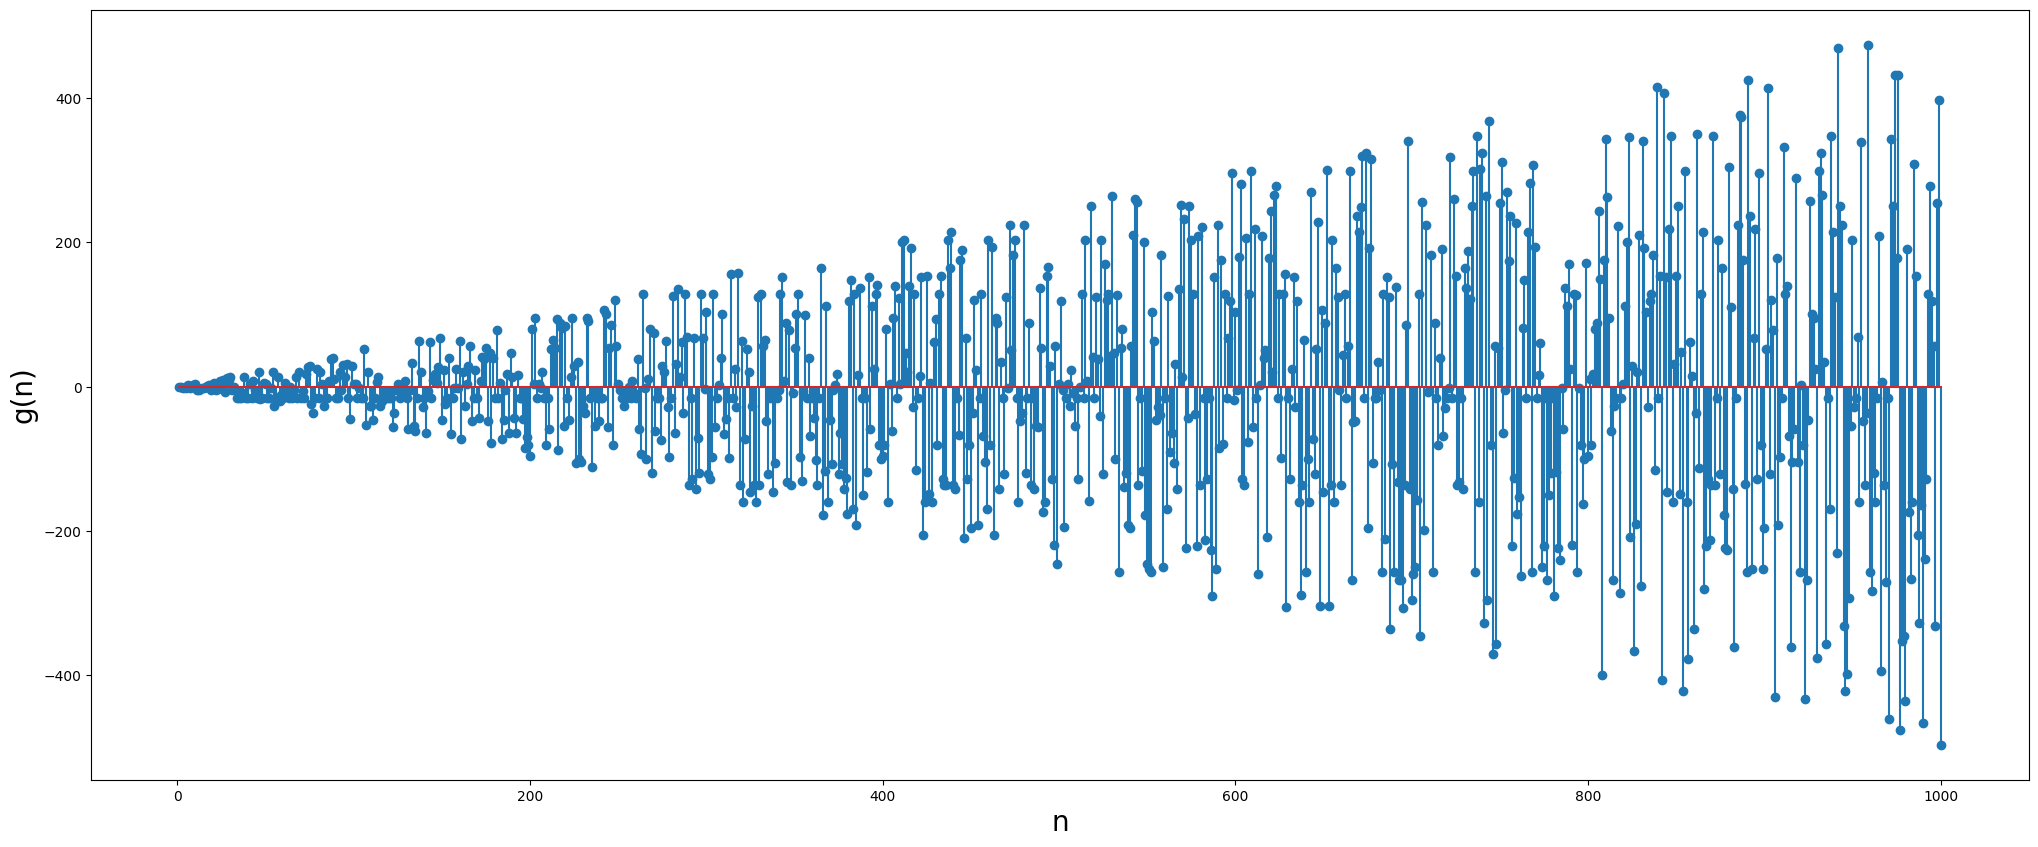

In [199]:
# Plot the graph
plt.figure(figsize=(25,10))
plt.xlabel("n", fontsize=20)
plt.ylabel("g(n)", fontsize=20)
plt.stem(n, g_n)

# Save the graph as png
plt.savefig("q1-a.png")

# b)

In [200]:
# Find n values satisfying g(n) = 0

print("n values satisfying g(n) = 0")
for i in range(0, 1000):
    if (g_n[i] == 0):
        print(i+1)

n values satisfying g(n) = 0
1
2
4
8
16
32
64
128
256
512


# Question 2

# c)

In [201]:
def create_nums_arr(precision, POWER):
    if (precision == 1):
    # Create an array for n values (single precision)
        n_arr_single = []
        for i in range(1, (10**POWER)+1):
            n_arr_single.append(np.float32(i))

        # Create an array for nums[n] values (single precision)
        nums_arr_single = []
        for n in n_arr_single:
            nums_n = np.float32(np.float32(1) + np.float32(np.float32(10**6) + np.float32(1) - n) * np.float32(10**(-8))) 
            nums_arr_single.append(nums_n) 
        
        return nums_arr_single
    if (precision == 2):   
        # Create an array for n values (double precision)
        n_arr_double = []
        for i in range(1, (10**POWER)+1):
            n_arr_double.append(np.float64(i))

        # Create an array for nums[n] values (double precision)
        nums_arr_double = []
        for n in n_arr_double:
            nums_n = np.float64(np.float64(1) + np.float64(np.float64(10**6) + np.float64(1) - n) * np.float64(10**(-8))) 
            nums_arr_double.append(nums_n)

        return nums_arr_double

### Naive Summation (Single Precision)

In [202]:
# Variable to hold summation
sum_naive_single = np.float32(0) 

# Create an array for nums[n] values
nums_arr = create_nums_arr(1, 6)

# Calculate naive sum
for element in nums_arr:
    sum_naive_single = sum_naive_single + element

formatted_sum_naive_single = format(sum_naive_single, ".10f")
print("Naive Summation (Single Precision) = " , formatted_sum_naive_single)

Naive Summation (Single Precision) =  1002466.6875000000


### Naive Summation (Double Precision)

In [203]:
# Variable to hold summation
sum_naive_double = np.float64(0) 


# Create an array for nums[n] values
nums_arr = create_nums_arr(2, 6)

# Calculate naive sum
for element in nums_arr:
    sum_naive_double = sum_naive_double + element

formatted_sum_naive_double = format(sum_naive_double, ".10f")
print("Naive Summation (Double Precision) = " , formatted_sum_naive_double)

Naive Summation (Double Precision) =  1005000.0049999995


### Compensated Summation (Single Precision)

In [204]:
# Create an array for nums[n] values
nums_arr = create_nums_arr(1, 6)

# Calculate compensated summation (single precison)
sum_compensated_single = np.float32(0)
e = np.float32(0)
for x in nums_arr:
    temp = sum_compensated_single
    y = x + e
    sum_compensated_single = temp + y
    e = (temp - sum_compensated_single) + y


formatted_sum_compensated_single = format(sum_compensated_single, ".10f")
print("Compensated Summation (Single Precision) = " , formatted_sum_compensated_single)

Compensated Summation (Single Precision) =  1005000.0000000000


### Compensated Summation (Double Precision)

In [205]:
# Create an array for nums[n] values
nums_arr = create_nums_arr(2, 6)

# Calculate compensated summation (single precison)
sum_compensated_double = np.float64(0)
e = np.float64(0)
for x in nums_arr:
    temp = sum_compensated_double
    y = x + e
    sum_compensated_double = temp + y
    e = (temp - sum_compensated_double) + y


formatted_sum_compensated_double = format(sum_compensated_double, ".10f")
print("Compensated Summation (Double Precision) = " , formatted_sum_compensated_double)    

Compensated Summation (Double Precision) =  1005000.0050000000


### Pairwise Summation (Single Precision)

In [206]:
# Create an array for nums[n] values
nums_arr = create_nums_arr(1, 6)

# define pairwise summation (single precision) recursively
def pairwise_summation_single(arr):
    l = len(arr)
    if l == 1: ## base case
        return arr[0]     
    else:
        slice_boundary = math.ceil(l/2)
        return pairwise_summation_single(arr[:slice_boundary]) + pairwise_summation_single(arr[slice_boundary:])

# calculate pairwise summation (single precision)
sum_pairwise_single = pairwise_summation_single(nums_arr)

formatted_sum_pairwise_single = format(sum_pairwise_single, ".10f")
print("Pairwise Summation (Single Precision) = " , formatted_sum_pairwise_single)

Pairwise Summation (Single Precision) =  1005000.0000000000


### Pairwise Summation (Double Precision)

In [207]:
# Create an array for nums[n] values
nums_arr = create_nums_arr(2, 6)

# define pairwise summation (single precision) recursively
def pairwise_summation_double(arr):
    l = len(arr)
    if l == 1: ## base case
        return arr[0]     
    else:
        slice_boundary = math.ceil(l/2)
        return pairwise_summation_double(arr[:slice_boundary]) + pairwise_summation_double(arr[slice_boundary:])

# calculate pairwise summation (single precision)
sum_pairwise_double = pairwise_summation_double(nums_arr)

formatted_sum_pairwise_double = format(sum_pairwise_double, ".10f")
print("Pairwise Summation (Double Precision) = " , formatted_sum_pairwise_double)

Pairwise Summation (Double Precision) =  1005000.0049999999


# d)

### Errors (Absolute Errors)

In [208]:
theoretical_sum = 1005000.005

# Calculate absolute errors
absolute_error_naive_single = abs(theoretical_sum - sum_naive_single)
absolute_error_naive_double = abs(theoretical_sum - sum_naive_double)
absolute_error_compensated_single = abs(theoretical_sum - sum_compensated_single)
absolute_error_compensated_double = abs(theoretical_sum - sum_compensated_double)
absolute_error_pairwise_single = abs(theoretical_sum - sum_pairwise_single)
absolute_error_pairwise_double = abs(theoretical_sum - sum_pairwise_double)

print("Error (Absolute Error) - Naive Summation (Single Precision) = ", absolute_error_naive_single)
print("Error (Absolute Error) - Naive Summation (Double Precision) = ", absolute_error_naive_double)
print("Error (Absolute Error) - Compensated Summation (Single Precision) = ", absolute_error_compensated_single)
print("Error (Absolute Error) - Compensated Summation (Double Precision) = ", absolute_error_compensated_double)
print("Error (Absolute Error) - Pairwise Summation (Single Precision) = ", absolute_error_pairwise_single)
print("Error (Absolute Error) - Pairwise Summation (Double Precision) = ", absolute_error_pairwise_double)

Error (Absolute Error) - Naive Summation (Single Precision) =  2533.3175000000047
Error (Absolute Error) - Naive Summation (Double Precision) =  4.656612873077393e-10
Error (Absolute Error) - Compensated Summation (Single Precision) =  0.005000000004656613
Error (Absolute Error) - Compensated Summation (Double Precision) =  0.0
Error (Absolute Error) - Pairwise Summation (Single Precision) =  0.005000000004656613
Error (Absolute Error) - Pairwise Summation (Double Precision) =  1.1641532182693481e-10


#### Comparison of Algorithms' Error

Naive-Single > Compensated-Single = Pairwise-Single > Naive-Double > Pairwise-Double > Compensated-Double

### Run times

I will convert each algorithm into a function. Then, I will execute each algorithm 10 times and take the average run time for comparison.

In [209]:
# define naive sum (single precision) as function
def naive_sum_single(nums_arr):
    sum = np.float32(0)
    for element in nums_arr:
        sum = sum + element
    return sum

# define naive sum (double precision) as function
def naive_sum_double(nums_arr):
    sum = np.float64(0)
    for element in nums_arr:
        sum = sum + element
    return sum

# define compensated sum (single precision) as function
def compensated_sum_single(nums_arr):
    sum_compensated_single = np.float32(0)
    e = np.float32(0)
    for x in nums_arr:
        temp = sum_compensated_single
        y = x + e
        sum_compensated_single = temp + y
        e = (temp - sum_compensated_single) + y
    return sum_compensated_single

# define compensated sum (double precision) as function
def compensated_sum_double(nums_arr):
    sum_compensated_single = np.float64(0)
    e = np.float64(0)
    for x in nums_arr:
        temp = sum_compensated_single
        y = x + e
        sum_compensated_single = temp + y
        e = (temp - sum_compensated_single) + y
    return sum_compensated_single

# define pairwise sum (single precision) as function
def pairwise_sum_single(nums_arr):
    sum = pairwise_summation_single(nums_arr)
    return sum

# define pairwise sum (double precision) as function
def pairwise_sum_double(nums_arr):
    sum = pairwise_summation_double(nums_arr)
    return sum

In [210]:
# Define average run time calculation function.
def average_runtime(algorithm, n_arr, TIMES):
    total_t = 0
    for i in range(TIMES):
        t_s = time.time() 
        algorithm(n_arr)
        t_e = time.time()
        total_t += (t_e - t_s)
    return total_t / TIMES

In [211]:
# Create nums arrays
nums_arr_single = create_nums_arr(1, 6)
nums_arr_double = create_nums_arr(2, 6)

# Calculate average run times
print("Average run time of naive summation (single precision) = ", average_runtime(naive_sum_single, nums_arr_single, 10))
print("Average run time of naive summation (double precision) = ", average_runtime(naive_sum_double, nums_arr_double, 10))
print("Average run time of compensated summation (single precision) = ", average_runtime(compensated_sum_single, nums_arr_single, 10))
print("Average run time of compensated summation (double precision) = ", average_runtime(compensated_sum_double, nums_arr_double, 10))
print("Average run time of pairwise summation (single precision) = ", average_runtime(pairwise_sum_single, nums_arr_single, 10))
print("Average run time of pairwise summation (double precision) = ", average_runtime(pairwise_sum_double, nums_arr_double, 10))


Average run time of naive summation (single precision) =  0.10348036289215087
Average run time of naive summation (double precision) =  0.11036529541015624
Average run time of compensated summation (single precision) =  0.34583773612976076
Average run time of compensated summation (double precision) =  0.37045485973358155
Average run time of pairwise summation (single precision) =  2.219097208976746
Average run time of pairwise summation (double precision) =  2.327226734161377


In [212]:
POWERS = [1, 2, 3, 4, 5, 6, 7] # powers of 10
num_arr_with_sizes_single = [create_nums_arr(1, 1), create_nums_arr(1, 2), create_nums_arr(1, 3), create_nums_arr(1, 4), create_nums_arr(1, 5), create_nums_arr(1, 6), create_nums_arr(1, 7)]
num_arr_with_sizes_double = [create_nums_arr(2, 1), create_nums_arr(2, 2), create_nums_arr(2, 3), create_nums_arr(2, 4), create_nums_arr(2, 5), create_nums_arr(2, 6), create_nums_arr(2, 7)]

In [213]:
def run_time_with_sizes(algorithm, precision):
    run_times = []
    for i in range(0, 7):
        if precision == 1:
            t = average_runtime(algorithm, num_arr_with_sizes_single[i], 1)
            run_times.append(t)
        if precision == 2:
            t = average_runtime(algorithm, num_arr_with_sizes_double[i], 1)
            run_times.append(t)
    return run_times

run_times_naive_single = run_time_with_sizes(naive_sum_single, 1)
run_times_naive_double = run_time_with_sizes(naive_sum_double, 2)
run_times_compensated_single = run_time_with_sizes(compensated_sum_single, 1)
run_times_compensated_double = run_time_with_sizes(compensated_sum_double, 2)
run_times_pairwise_single = run_time_with_sizes(pairwise_sum_single, 1)
run_times_pairwise_double = run_time_with_sizes(pairwise_sum_double, 2)

print(run_times_naive_single)
print(run_times_naive_double)
print(run_times_compensated_single)
print(run_times_compensated_double)
print(run_times_pairwise_single)
print(run_times_pairwise_double)

[1.5020370483398438e-05, 1.049041748046875e-05, 9.894371032714844e-05, 0.0008530616760253906, 0.014685869216918945, 0.10943102836608887, 1.0117440223693848]
[6.747245788574219e-05, 9.107589721679688e-05, 0.00039076805114746094, 0.0015745162963867188, 0.009617090225219727, 0.09976840019226074, 0.9944961071014404]
[2.7894973754882812e-05, 3.0279159545898438e-05, 0.0003826618194580078, 0.002649545669555664, 0.03371453285217285, 0.3119683265686035, 3.1689453125]
[9.059906005859375e-06, 3.170967102050781e-05, 0.0002818107604980469, 0.0027828216552734375, 0.0339350700378418, 0.32831716537475586, 3.4102020263671875]
[3.0040740966796875e-05, 0.00016880035400390625, 0.004069328308105469, 0.0194246768951416, 0.21886301040649414, 2.136589527130127, 23.466965436935425]
[8.0108642578125e-05, 0.00042176246643066406, 0.003148794174194336, 0.033599138259887695, 0.2300708293914795, 2.4070658683776855, 22.896834135055542]


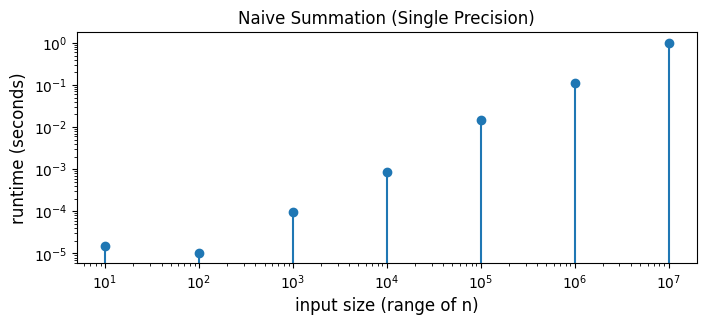

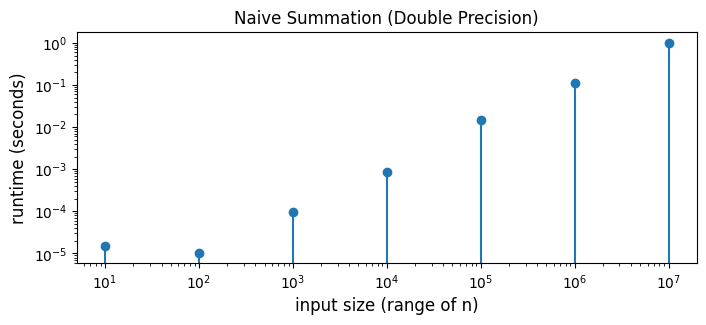

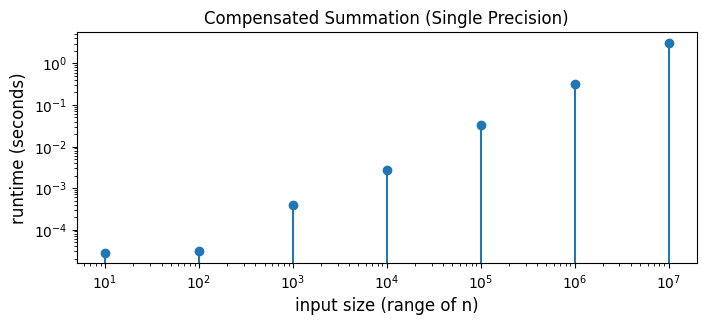

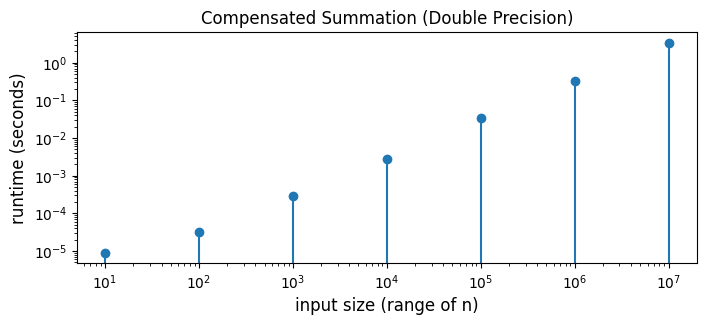

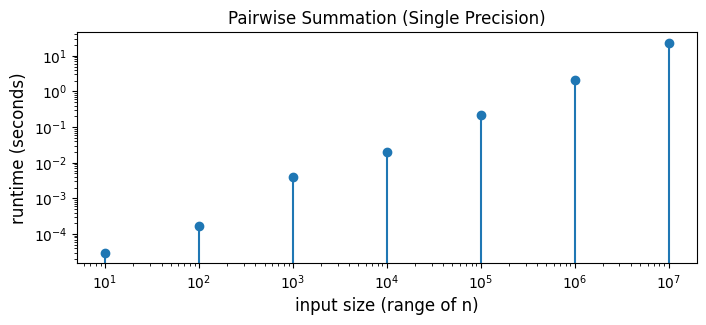

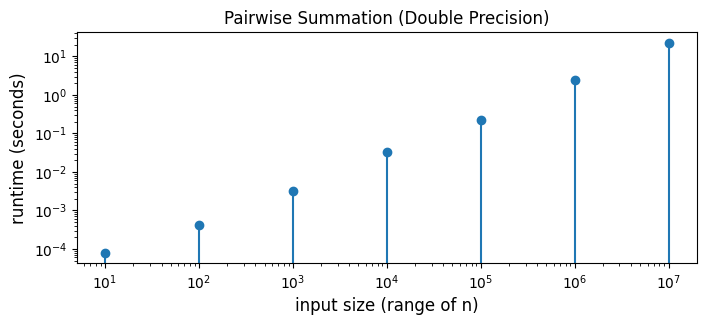

In [214]:
def plot_runtime_graph(runtimes, title):
    # Plot the graph
    plt.figure(figsize=(8,3))
    plt.xlabel("input size (range of n)", fontsize=12)
    plt.ylabel("runtime (seconds)", fontsize=12)
    plt.yscale("log")
    plt.xscale("log")
    plt.title(title)
    plt.stem([10**power for power in POWERS], runtimes)
    plt.savefig(title + ".png", bbox_inches='tight', dpi=150)

plot_runtime_graph(run_times_naive_single, "Naive Summation (Single Precision)")
plot_runtime_graph(run_times_naive_single, "Naive Summation (Double Precision)")
plot_runtime_graph(run_times_compensated_single, "Compensated Summation (Single Precision)")
plot_runtime_graph(run_times_compensated_double, "Compensated Summation (Double Precision)")
plot_runtime_graph(run_times_pairwise_single, "Pairwise Summation (Single Precision)")
plot_runtime_graph(run_times_pairwise_double, "Pairwise Summation (Double Precision)")